# Predicting with Regression
- Using the Wage Dataset fro ISLR package
- Predict wage Variable using Regression

In [5]:
# Load packages
library(ISLR)
library(ggplot2)
library(caret)

data(Wage)

In [6]:
head(Wage)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


In [7]:
# Exclude logwage from the dataset
Wage <- subset(Wage, select = -c(logwage))
head(Wage)

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,127.11574


In [8]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

## Partition Data

In [9]:
inTrain <- createDataPartition(y = Wage$wage, p = 0.7, list = FALSE)

# Sub-set titanic data to Train and to Test
training <- Wage[inTrain, ]
testing <- Wage[-inTrain, ]
dim(training)
dim(testing)

[1] 2102   10

[1] 898  10

## Look at a featurePlot
- Visible correlation between age and wage
- Some Variation (2 distinct groups)
- Variation can be explained by jobclass and by education

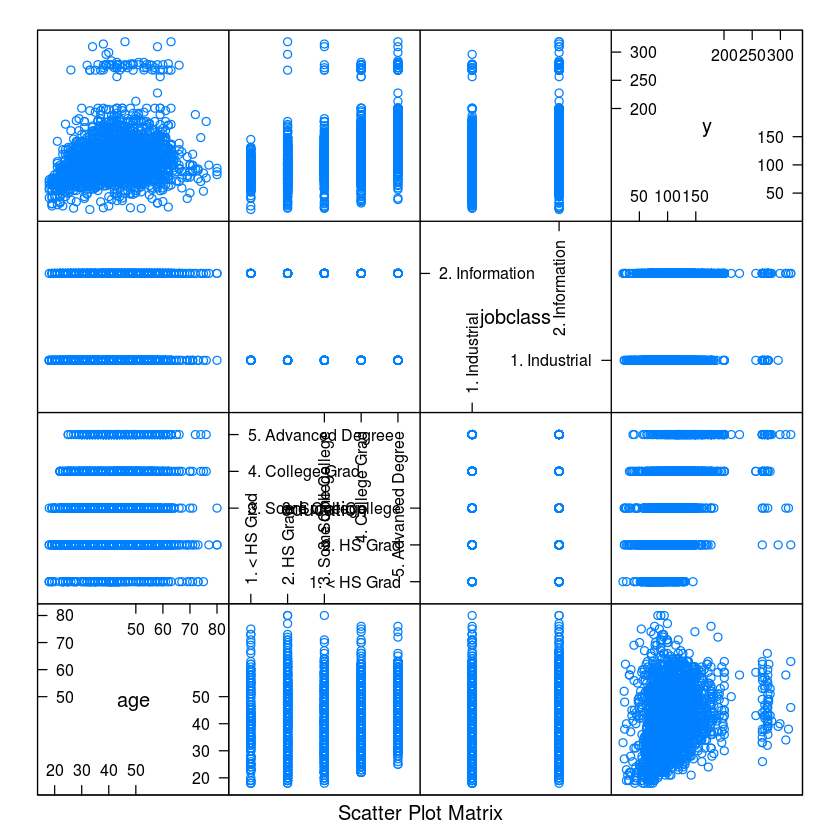

In [10]:
featurePlot(x = training[, c("age", "education", "jobclass")], y = training$wage, plot = "pairs")

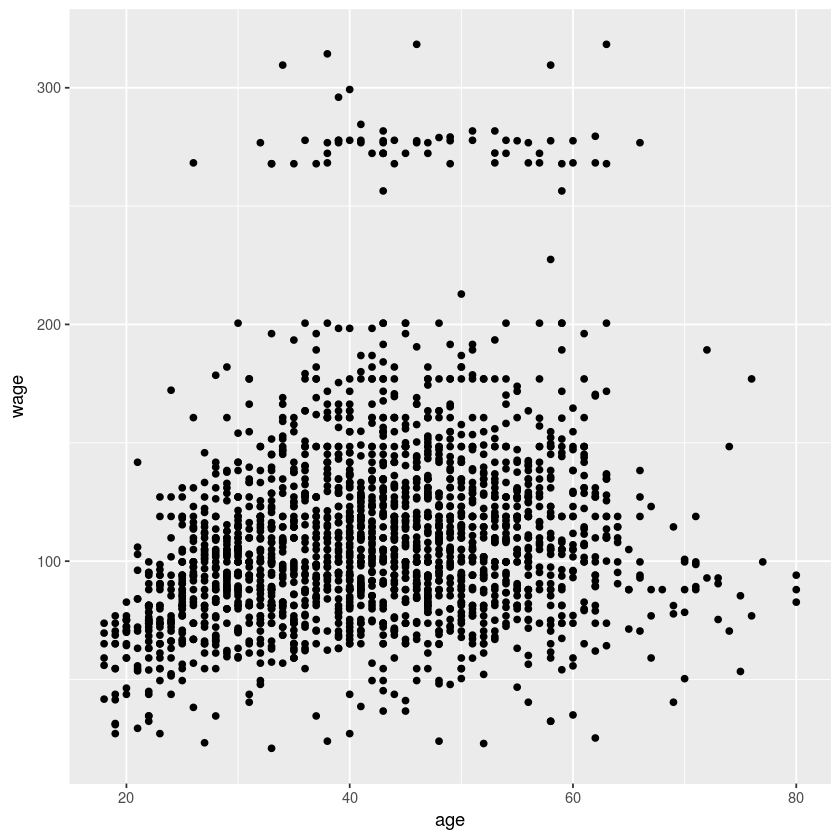

In [11]:
# Plot age vs wage
qplot(age, wage, data = training)

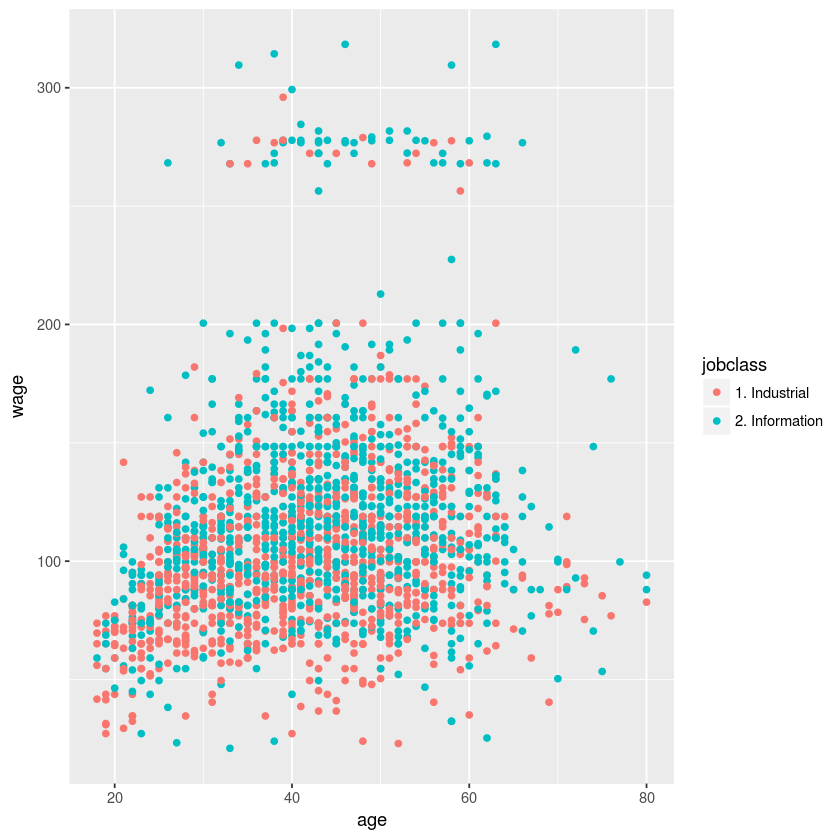

In [12]:
# Plot age vs wage with jobclass as color
qplot(age, wage, data = training, color = jobclass)

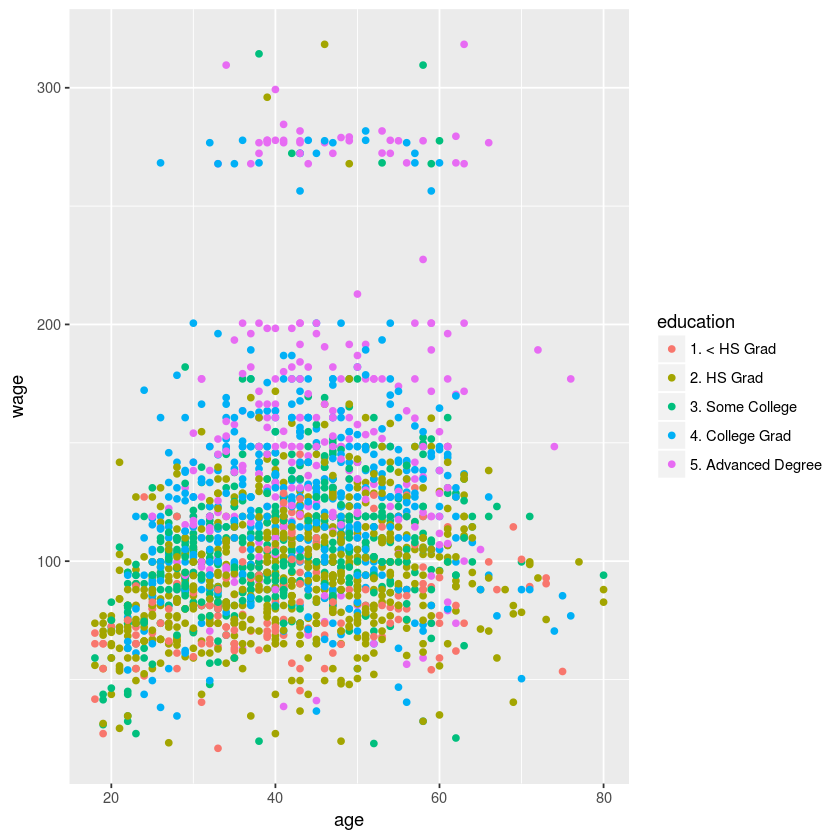

In [13]:
# Plot age vs wage with education as color
qplot(age, wage, data = training, color = education)

## Fit a Linear Model
- Using Multiple Variables

In [16]:
model <- train(wage ~ age + jobclass + education, method = "lm", data = training)
model

Linear Regression 

2102 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2102, 2102, 2102, 2102, 2102, 2102, ... 
Resampling results:

  RMSE      Rsquared 
  36.75691  0.2661191

Tuning parameter 'intercept' was held constant at a value of TRUE


## Diagnostics
- Plot residuals vs fitted values

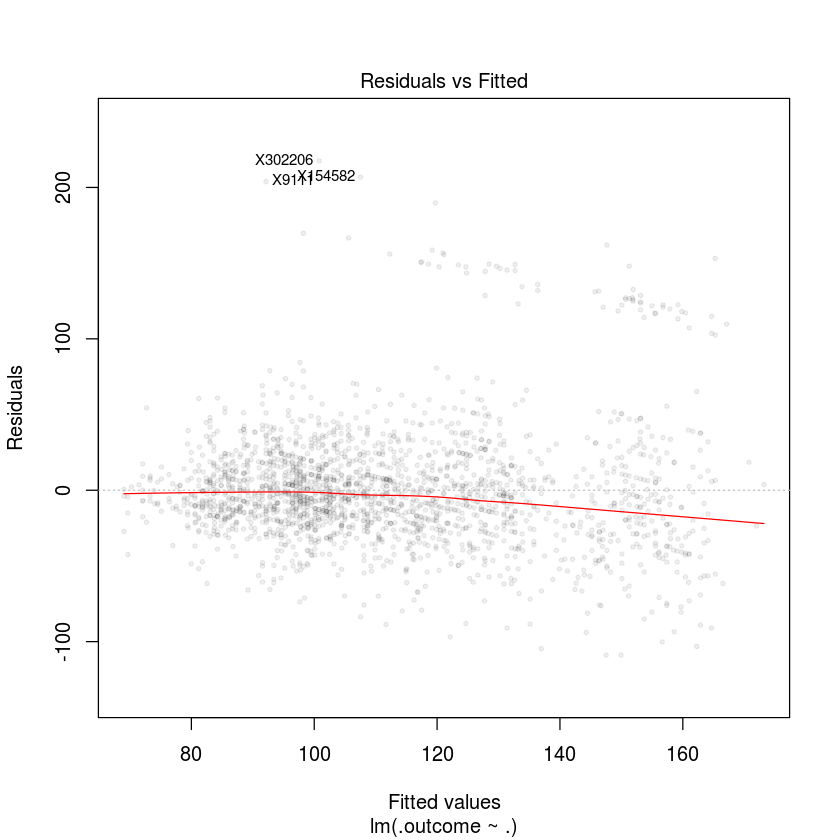

In [17]:
plot(model$finalModel, 1, pch = 19, cex = 0.5, col = "#00000010")

## Color by Variables not used in the Model
- Some outliers could be explained by race

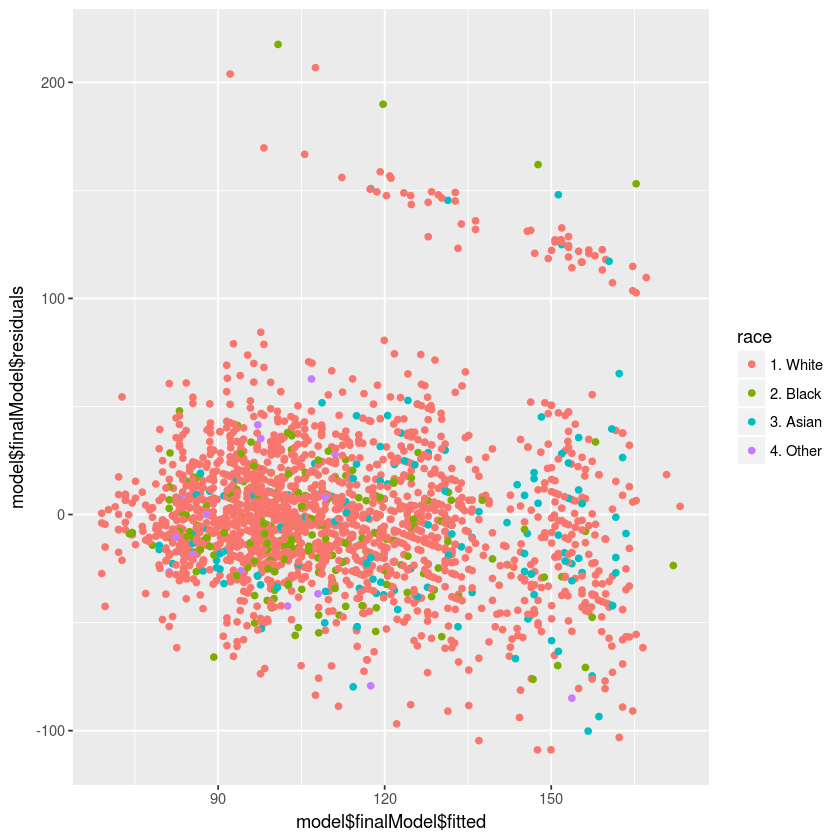

In [18]:
qplot(model$finalModel$fitted, model$finalModel$residuals, color= race, data = training)

## Predicted vs True Test wage

In [23]:
pred <- predict(model, testing)

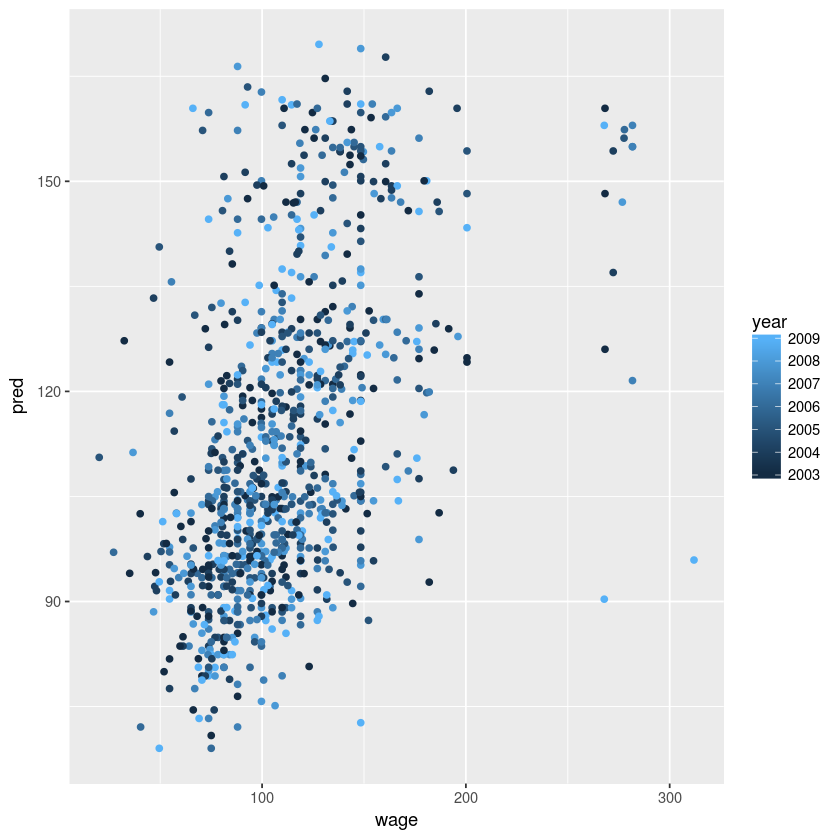

In [25]:
qplot(wage, pred, color = year, data = testing)

## Using all Varibles in the Model

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdat

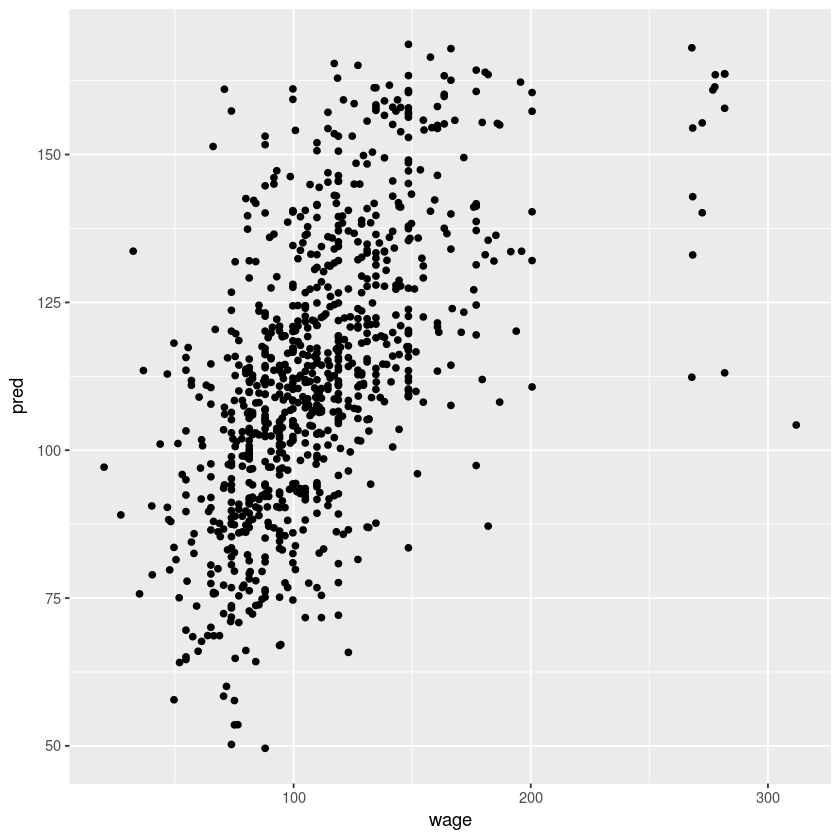

In [26]:
model <- train(wage ~ ., data = training, method = "lm")
pred <- predict(model, testing)
qplot(wage, pred, data = testing)